In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
import chardet
with open(r"C:\Users\adity\Desktop\spam.csv", 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
df = pd.read_csv(r'C:\Users\adity\Desktop\spam.csv', encoding=encoding)
encodings_to_try = ['utf-8', 'ISO-8859-1', 'utf-16']
for encoding in encodings_to_try:
    try:
        df = pd.read_csv(r'C:\Users\adity\Desktop\spam.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        continue


In [ ]:
df = pd.read_csv(r'C:\Users\adity\Desktop\spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2008,ham,See the forwarding message for proof,NaN,NaN,NaN
4164,spam,"Dear Voucher Holder, To claim this weeks offer...",NaN,NaN,NaN
1678,ham,So many people seems to be special at first si...,NaN,NaN,NaN
950,ham,"Awesome, lemme know whenever you're around",NaN,NaN,NaN
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In...",NaN,NaN,NaN
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th...",NaN,NaN,NaN
4396,ham,When did dad get back.,NaN,NaN,NaN
1768,ham,How. Its a little difficult but its a simple w...,NaN,NaN,NaN
4966,spam,You can donate å£2.50 to UNICEF's Asian Tsunam...,NaN,NaN,NaN
3803,ham,"No dude, its not fake..my frnds got money, tht...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

Stepd to follows

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evalution
6. Improvement
7. website
8. Deploy

1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.sample()


,v1,v2
1949,ham,Wait 2 min..stand at bus stop


In [ ]:
df.shape

(5572, 2)

In [ ]:
# dont know what these v1 and v2 is telling, renaming the columns

df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# in target , there is ham or spam is written instead of that i want numbers.so for that reason im applying label encoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df['target'] 

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int32

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# now checking missing value

df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicated values
df.duplicated().sum()

403

In [ ]:
# remove duplicate values
df = df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5169, 2)

2. EDA - Exporatory Data Analysis

In [ ]:
# we should get the understanding and behaviour of the data and this understanding comes when we perform EDA(Exporatory Data Analysis)

# knowing that how many times we have ham and spam
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

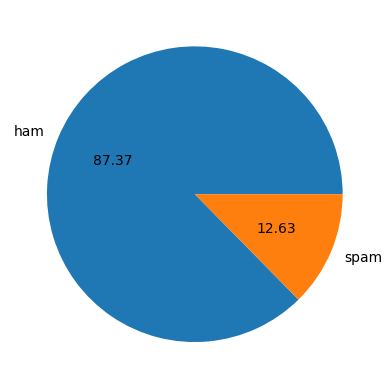

In [ ]:
# for better represent
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
# so we dont get extra peice of code
plt.show()

In [ ]:
# data is imbalanced

In [ ]:
# we are making Three columns
#1 No of characters in the sms
#2 No of words in the sms
#3 no of sentenses in the sms

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# checking the number of characters in a text column
# also made a new column and store those length of a characters
df['num_characters']=df['text'].apply(len)
df['num_characters']

c:\Users\adity\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [ ]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# fetching num of words in a text columns
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

c:\Users\adity\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# creating a new column where no of sentences will be there
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences']

c:\Users\adity\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters',	'num_words',	'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

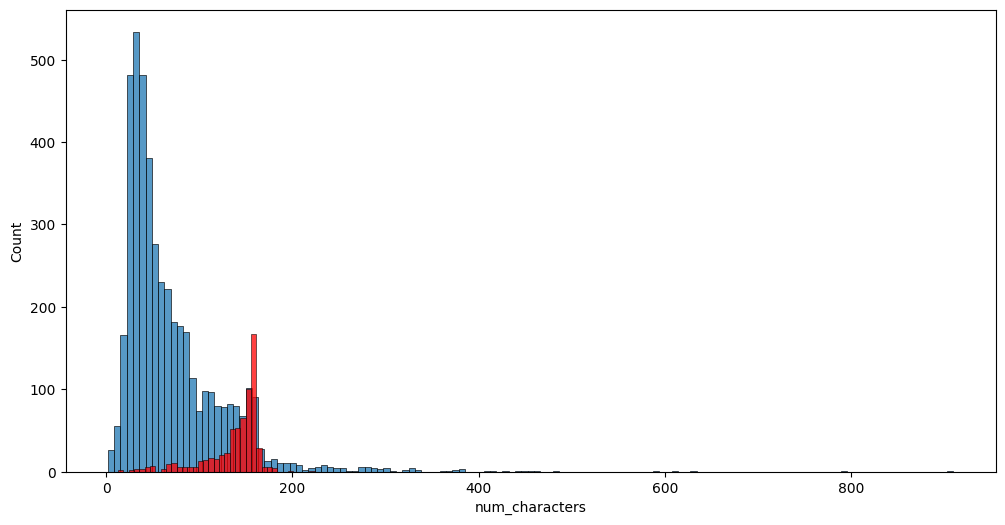

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])#ham

sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')
#spam


<AxesSubplot:xlabel='num_words', ylabel='Count'>

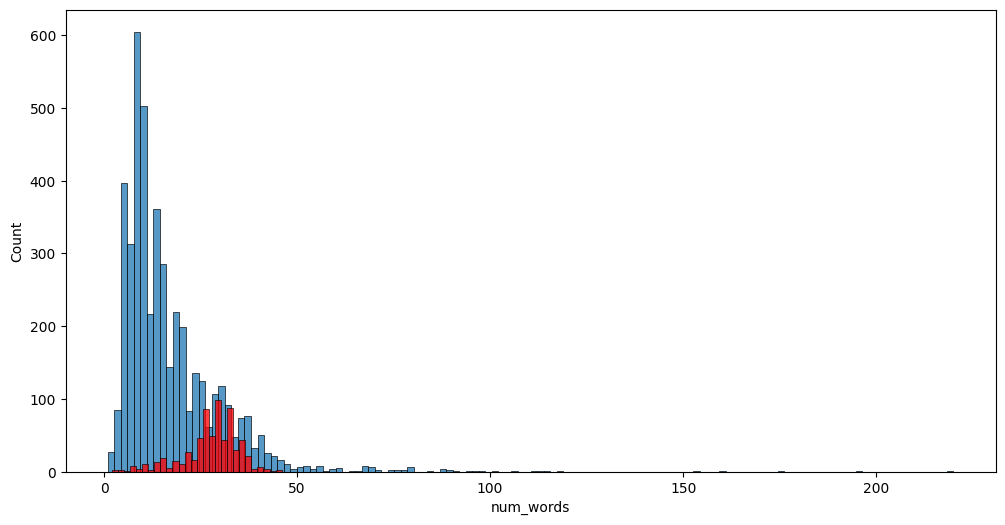

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])#ham

sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')
#spam

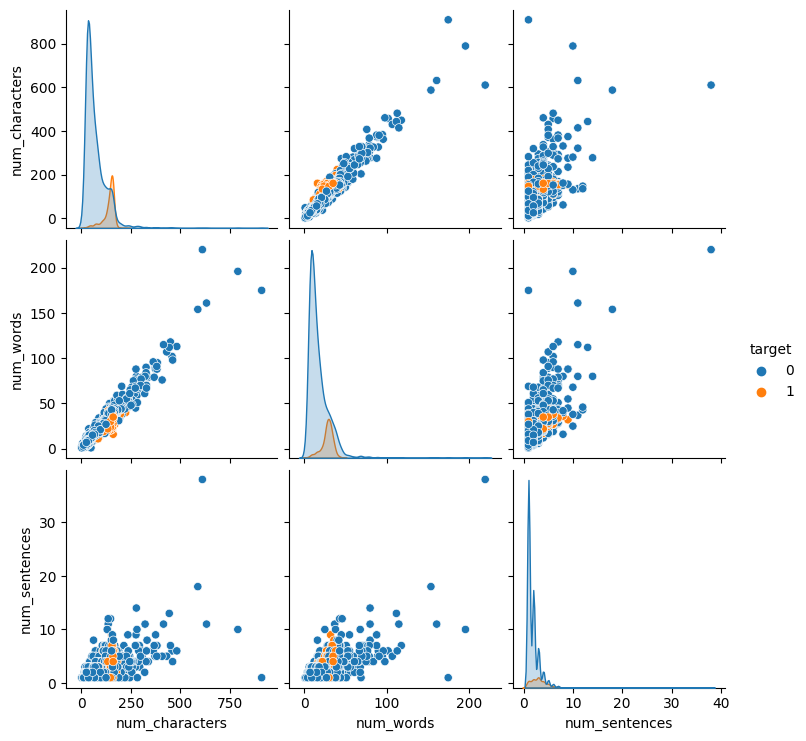

In [ ]:
# viewing the relation between num_words and num_sentences
sns.pairplot(df,hue='target')


<AxesSubplot:>

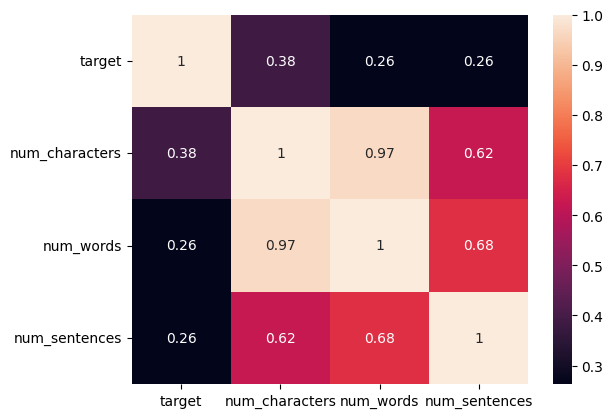

In [ ]:
# checking the corelation with heatmap
sns.heatmap(df.corr(), annot=True)

3. Data Preprcessing -> Data preprocessing proces has been done through these following steps.

a)Lower case -> convert data into lowercase

b)Tokenization -> break into words

c) Removing special characters 

d) Removing stop words and punctuation -> remove words wich are used in the sentence formation i.e (to, is , for, a , in , on, of, the)

e)stemming -> convert similar type of words into one 
i.e ( dance , dancing, danced = dance) bcz in the end meaning of these three words are same , dance

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
# a) Lower Case
# b) Tokenize
# c) removing special character
# d) remove stop words and punctuation 
# e) stemming

# Making a function wich will convert characters into lower case,Tokenize,remove special characters,remove stop words and punctuation and stemming

def transform_text(text):
    #a) converting into Lower Case
    text = text.lower()

    #b) tokenizing the words
    text = nltk.word_tokenize(text)

    #c) removing the special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    #d) removing stop words and punctuation
    # clonning of y to a text, where y is a list
    text = y[:]    
    # then we have clear the data of y     
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    #e) stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    # returning as a string whatever is inside.
    return " ".join(y)

In [ ]:
transform_text('I loved the YT lectures on Machine Learning. How about You?') 

'love yt lectur machin learn'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

c:\Users\adity\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
#1 wordclouds with spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

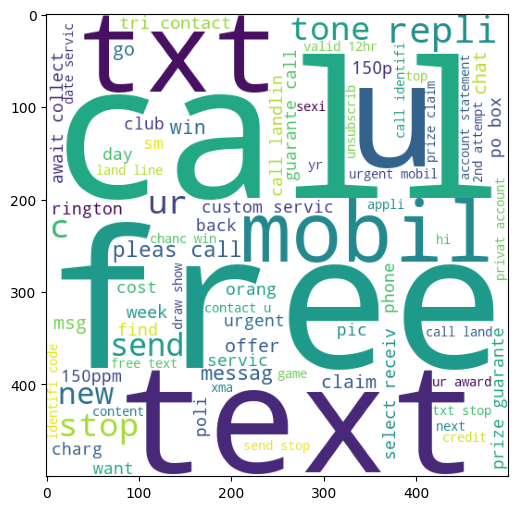

In [ ]:
# is will show that wich type of words are mostly used in spam 

#giving size if we want little bit more bigger
plt.figure(figsize=(12,6))
# printing now
plt.imshow(spam_wc)

In [ ]:
#2 wordclods with ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

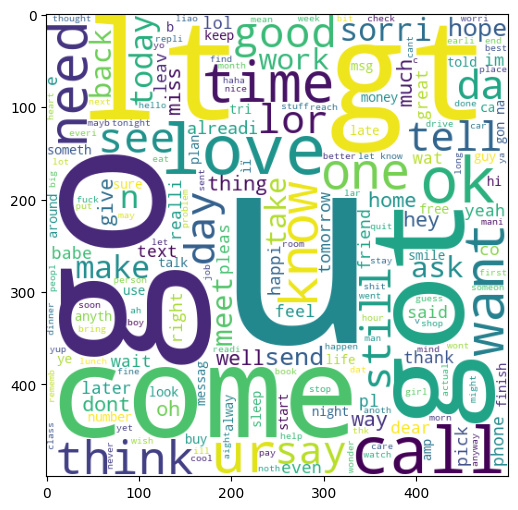

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
# now fetching top 30 40 words from both ham and spam

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)



In [ ]:
# finding how many words are there in a list of spam_corpus
len(spam_corpus)

9939

4. Model Building

In [104]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [105]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
X.shape

(5169, 3000)

In [144]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [145]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [146]:
y = df['target'].values

In [147]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [150]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [153]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [154]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [155]:
# tfidf --> MNB

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [157]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [158]:
# making dictionary
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' : gdbt,
    'xgb' : xgb
}

In [159]:
from sklearn.metrics import accuracy_score, precision_score


In [160]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [161]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [162]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print('For ', name)
    print('Accuracy -',current_accuracy)
    print('Precision - ',current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  SVC
Accuracy - 0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy - 0.9052224371373307
Precision -  1.0
For  NB
Accuracy - 0.9709864603481625
Precision -  1.0
For  DT
Accuracy - 0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy - 0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy - 0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy - 0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy - 0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy - 0.9748549323017408
Precision -  0.9745762711864406
For  GDBT
Accuracy - 0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy - 0.9671179883945842
Precision -  0.9333333333333333


In [163]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [164]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
2,NB,0.970986,1.000000
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
4,LR,0.958414,0.970297
7,BgC,0.958414,0.868217
9,GDBT,0.946809,0.919192
3,DT,0.930368,0.836735


In [165]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,RF,Accuracy,0.975822
2,ETC,Accuracy,0.974855
3,NB,Accuracy,0.970986
4,xgb,Accuracy,0.967118
5,AdaBoost,Accuracy,0.960348
6,LR,Accuracy,0.958414
7,BgC,Accuracy,0.958414
8,GDBT,Accuracy,0.946809
9,DT,Accuracy,0.930368


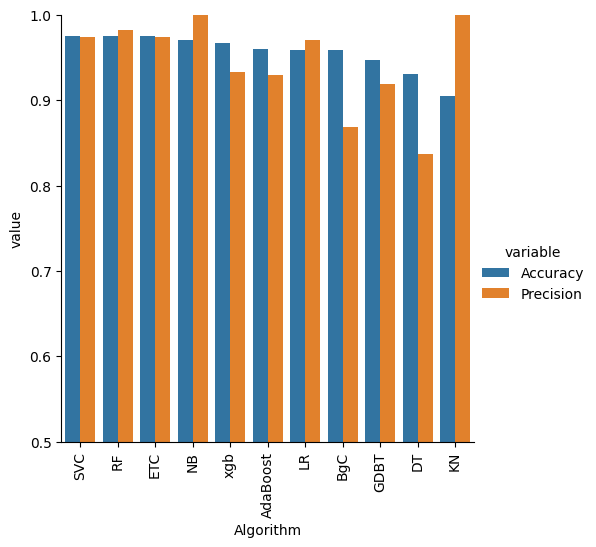

In [166]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data=performance_df1, kind='bar', height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [167]:
# model improve

In [168]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [169]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790,0.975822,0.974790
1,RF,0.975822,0.982906,0.975822,0.982906
2,ETC,0.974855,0.974576,0.974855,0.974576
3,NB,0.970986,1.000000,0.970986,1.000000
4,xgb,0.967118,0.933333,0.967118,0.933333
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,LR,0.958414,0.970297,0.958414,0.970297
7,BgC,0.958414,0.868217,0.958414,0.868217
8,GDBT,0.946809,0.919192,0.946809,0.919192
9,DT,0.930368,0.836735,0.930368,0.836735


In [170]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))